In [1]:
#Importing everything required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# packages - Text Processing
import string
import re
# Libraries = text preprocessing.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading sklearn packages for modelling.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/My Drive/Colab Notebooks/'

#Initialising the training and testing data
train_df = pd.read_csv(data_dir + '/train.csv', sep = ',')
test_df = pd.read_csv(data_dir + '/test.csv' , sep = ',')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


In [2]:
#Displaying the first fews of both the datas
display(train_df.head())
display(test_df.head())

#There are some missing values which we need to process
#Getting data information
display(train_df.info())
display(test_df.info())

#Filling in the missing values with na for the respective columns.
for df in [train_df, test_df]:
    df.fillna({col: f'Missing_{col}' for col in ['keyword', 'location']}, inplace=True)
display(train_df.info())
display(test_df.info())



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

We clean the dataset to remove unnecessary noise such as punctuations, links and URLs.

In [3]:
#We remove punctuation and URLs from the text
train_df['text_clean'] = train_df['text'].apply(lambda x: re.sub(r'https?://\S+|(?:www\.)\S+', '', x)).apply(lambda x: re.sub(r'[^\w\s]', '', x))

display(train_df)



,id,keyword,location,text,target,text_clean
0,1,Missing_keyword,Missing_location,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,Missing_keyword,Missing_location,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,Missing_keyword,Missing_location,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,Missing_keyword,Missing_location,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,Missing_keyword,Missing_location,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,Missing_keyword,Missing_location,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,Missing_keyword,Missing_location,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary TheTawniest The out of control wil...
7610,10871,Missing_keyword,Missing_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii
7611,10872,Missing_keyword,Missing_location,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


Now that the dataset is clean without unnecessary noise, we can begin to do Exploratary Data Analysis on the tweets. We can start with identifying top 50 words for each category of tweets (0 and 1) (Non disaster/Disaster).

In [4]:
#Usually the tweets are dominated by stopwords such as 'the', 'and', 'in', 'an','to','of'.
#These would present non significant findings in our EDA and for this reason.
#we will remove the stopwords and then select the top 50 words frome each category.

stop = set(stopwords.words('english'))

train_df['stopwords_removed'] = train_df['text_clean'].apply(
    lambda text_clean: [word.lower() for word in word_tokenize(text_clean) if word.lower() not in stop]
)

display(train_df)





,id,keyword,location,text,target,text_clean,stopwords_removed
0,1,Missing_keyword,Missing_location,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,Missing_keyword,Missing_location,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,Missing_keyword,Missing_location,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[residents, asked, shelter, place, notified, o..."
3,6,Missing_keyword,Missing_location,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,Missing_keyword,Missing_location,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...
7608,10869,Missing_keyword,Missing_location,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,Missing_keyword,Missing_location,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary TheTawniest The out of control wil...,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,10871,Missing_keyword,Missing_location,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii,"[m194, 0104, utc5km, volcano, hawaii]"
7611,10872,Missing_keyword,Missing_location,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...,"[police, investigating, ebike, collided, car, ..."


After neglecting the stopwords, we can carry on with our EDA

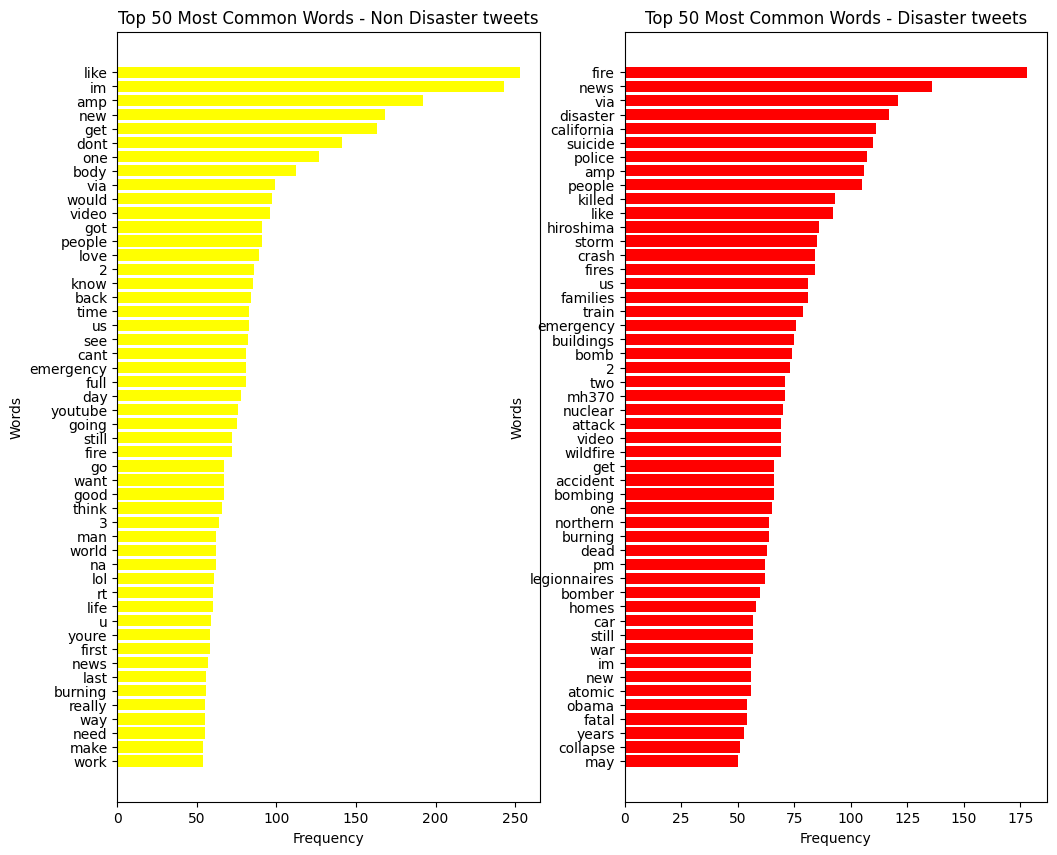

In [5]:
tokens_disaster = []
tokens_non_disaster = []
for text in train_df[train_df['target']==0]['stopwords_removed']:
    tokens_non_disaster += text

for text in train_df[train_df['target']==1]['stopwords_removed']:
    tokens_disaster += text

# calculate the frequency distribution of the words
count_non_dis = FreqDist(tokens_non_disaster)
count_dis = FreqDist(tokens_disaster)

top_words_non = count_non_dis.most_common(50)[::-1]
words_n, freqs_n = zip(*top_words_non)

top_words_dis = count_dis.most_common(50)[::-1]
words_d, freqs_d = zip(*top_words_dis)

fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,10))
# Plotting the graphs
ax1.barh(words_n, freqs_n, color='yellow')
ax2.barh(words_d, freqs_d, color='red')

ax1.set_title('Top 50 Most Common Words - Non Disaster tweets')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Words')

ax2.set_title('Top 50 Most Common Words - Disaster tweets')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Words')

# plotting the frequency
plt.show()

From this visualization, we can clearly identify the set of the most common words from tweets that are usually associated with a disaster event. The common words in non-disaster tweets generally tend to be normal and dont sound dangerous at all. We can now start applying models and check if it predicts the right target.


In [6]:
from sklearn.model_selection import train_test_split

# Combine tokens into a single sentence
train_df['stopwords_removed_sentence'] = train_df['stopwords_removed'].apply(lambda x: ' '.join(x))


X = train_df['stopwords_removed_sentence']

# Target variable
y = train_df['target']

# Split the data into training and validation sets (10% of data used for validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

# Create a CountVectorizer object with n-grams ranging from 1 to 3 and binary mode enabled
count_vect = CountVectorizer(ngram_range=(1, 3), binary=True)

# Fit the vectorizer to the training data and transform it into a feature matrix
X_train_BOW = count_vect.fit_transform(X_train)

# Transform the validation data into the same feature space
X_val_BOW = count_vect.transform(X_val)

# Create a TfidfVectorizer object with similar settings as CountVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1, 3), binary=True, smooth_idf=False)

# Fit the vectorizer to the training data and transform it into a TF-IDF feature matrix
X_train_tfidf = tf_idf.fit_transform(X_train)

# Transform the validation data using the fitted TF-IDF model
X_val_tfidf = tf_idf.transform(X_val)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def KNN_Classifier(X_train, X_val, y_train, y_val, n_neighbors=5):
    # Initialize the KNN model with the specified number of neighbors
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the labels for the validation data
    labels_val = model.predict(X_val)

    # Calculate and print the accuracy of the model on the validation data
    score_val = metrics.accuracy_score(y_val, labels_val)
    print("Validation accuracy: %0.3f" % score_val)

    # Predict the labels for the training data
    labels_train = model.predict(X_train)

    # Calculate and print the accuracy of the model on the training data
    score_train = metrics.accuracy_score(y_train, labels_train)
    print("Training accuracy: %0.3f" % score_train)

# Example usage with hypothetical training and validation data
print('Accuracy for BOW')
KNN_Classifier(X_train_BOW, X_val_BOW, y_train, y_val)

print('Accuracy for tf-idf')
KNN_Classifier(X_train_tfidf, X_val_tfidf, y_train, y_val)


Accuracy for BOW
Validation accuracy: 0.656
Training accuracy: 0.694
Accuracy for tf-idf
Validation accuracy: 0.745
Training accuracy: 0.836


In [7]:
#SELECTING THE BEST HYPERPARAMETERS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

def KNN_Classifier_GridSearch(X_train, X_val, y_train, y_val):
    # Define the model
    model = KNeighborsClassifier()

    # Define the parameters grid
    param_grid = {
        'n_neighbors': [3, 5, 7, 10],  # Various options for n_neighbors
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model after grid search
    best_model = grid_search.best_estimator_

    # Predict the labels for the validation data
    labels_val = best_model.predict(X_val)
    score_val = metrics.accuracy_score(y_val, labels_val)
    print("Best Model Validation Accuracy: %0.3f" % score_val)
    print("Best Parameters:", grid_search.best_params_)

    # Predict the labels for the training data
    labels_train = best_model.predict(X_train)
    score_train = metrics.accuracy_score(y_train, labels_train)
    print("Best Model Training Accuracy: %0.3f" % score_train)

# Example usage with hypothetical training and validation data
print('Accuracy for BOW')
KNN_Classifier_GridSearch(X_train_BOW, X_val_BOW, y_train, y_val)

print('Accuracy for tf-idf')
KNN_Classifier_GridSearch(X_train_tfidf, X_val_tfidf, y_train, y_val)


Accuracy for BOW
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Validation Accuracy: 0.681
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Model Training Accuracy: 0.988
Accuracy for tf-idf
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Model Validation Accuracy: 0.778
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Model Training Accuracy: 0.988


In [8]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
def Log_regression(X_train,X_val,y_train,y_val):
  # Define our logistic regression model with default parameters
  model = LogisticRegression(max_iter = 10000)

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Make predictions on the validation data
  labels = model.predict(X_val)

  # Evaluate the model's accuracy on the validation data
  score = model.score(X_val, y_val)

  print("Validation accuracy: %0.3f" % score)

  # Make predictions on the training data
  labels = model.predict(X_train)

  # Evaluate the model's accuracy on the training data
  score = model.score(X_train, y_train)
  print("Training accuracy: %0.3f" % score)

print('Accuracy for BOW')
Log_regression(X_train_BOW,X_val_BOW,y_train,y_val)

print('Accuracy for tf-idf')
Log_regression(X_train_tfidf,X_val_tfidf,y_train,y_val)



Accuracy for BOW
Validation accuracy: 0.776
Training accuracy: 0.985
Accuracy for tf-idf
Validation accuracy: 0.790
Training accuracy: 0.919


In [9]:
#HYPERPARAMETERS SELECTION FOR LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def Log_regression_GridSearch(X_train, X_val, y_train, y_val):
    # Define the logistic regression model
    model = LogisticRegression(solver = 'liblinear',max_iter=10000)

    # Define the parameter grid
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C':[0.1, 1, 10, 100]


    }

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model after grid search
    best_model = grid_search.best_estimator_

    # Predict and evaluate on the validation data
    labels_val = best_model.predict(X_val)
    score_val = accuracy_score(y_val, labels_val)
    print("Best Model Validation Accuracy: %0.3f" % score_val)
    print("Best Parameters:", grid_search.best_params_)

    # Predict and evaluate on the training data
    labels_train = best_model.predict(X_train)
    score_train = accuracy_score(y_train, labels_train)
    print("Best Model Training Accuracy: %0.3f" % score_train)

# Example usage with hypothetical training and validation data
print('Accuracy for BOW')
Log_regression_GridSearch(X_train_BOW, X_val_BOW, y_train, y_val)




Accuracy for BOW
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Model Validation Accuracy: 0.774
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Model Training Accuracy: 0.985


In [10]:
#RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier
def RF(X_train,X_val,y_train,y_val):
  # Define the random forest model with 200 trees
  model = RandomForestClassifier(n_estimators=200)

  # Fitting the model to training data
  model.fit(X_train, y_train)

  # Making predictions on the validation data
  labels = model.predict(X_val)

  # Evaluate the model's accuracy on the validation data
  score = model.score(X_val, y_val)
  print("Validation accuracy: %0.3f" % score)

  # Making predictions on the training data
  labels = model.predict(X_train)

  # Evaluating the model's accuracy on the training data
  score = model.score(X_train, y_train)
  print("Training accuracy: %0.3f" % score)

print('Accuracy for BOW')
RF(X_train_BOW,X_val_BOW,y_train,y_val)

print('Accuracy for tf-idf')
RF(X_train_tfidf,X_val_tfidf,y_train,y_val)

Accuracy for BOW
Validation accuracy: 0.766
Training accuracy: 0.988
Accuracy for tf-idf
Validation accuracy: 0.774
Training accuracy: 0.988


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def RF_hyperparameter_tuning(X_train, X_val, y_train, y_val):
    # Parameters grid to explore
    param_grid = {
        'n_estimators': [100, 200,300],
        'max_depth': [10, 20,30],
        'min_samples_split': [2, 5]
    }

    # Define the random forest model
    rf = RandomForestClassifier(random_state=42)

    # Grid search with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Making predictions and evaluating the model on validation data
    val_predictions = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print("Validation accuracy: {:.3f}".format(val_accuracy))

    # Making predictions and evaluating the model on training data
    train_predictions = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print("Training accuracy: {:.3f}".format(train_accuracy))

    # Print the best parameters
    print("Best parameters found: ", grid_search.best_params_)

print('Accuracy for BOW')
RF_hyperparameter_tuning(X_train_BOW, X_val_BOW, y_train, y_val)

print('Accuracy for tf-idf')
RF_hyperparameter_tuning(X_train_tfidf, X_val_tfidf, y_train, y_val)


Accuracy for BOW
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Validation accuracy: 0.665
Training accuracy: 0.684
Best parameters found:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for tf-idf
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Validation accuracy: 0.669
Training accuracy: 0.686
Best parameters found:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}


The best Model we got was from the K-Nearest-neighbour for the TF-IDF model where we got the validation accuracy as 0.778. We can now retrain this model on the combination of training and validation and finally test it on the testing data.


In [12]:
#Training and Testing the Best model



from scipy.sparse import vstack
# Assume X_train, y_train are already defined and tf_idf is the TfidfVectorizer instance you used earlier

# Retrain using the combined training and validation data
X_train_full = vstack([X_train_tfidf, X_val_tfidf])  # Use the same TF-IDF vectorization
y_train_full = pd.concat([y_train, y_val])

# Prepare the test data
X_test = train_df.iloc[-1000:]['text']  # Replace 'text_column' with the actual column name containing text
X_test_vectorized = tf_idf.transform(X_test)
y_test = train_df.iloc[-1000:]['target']






# Initialize the KNN model with the best parameters
model = KNeighborsClassifier(n_neighbors=10, metric='euclidean', weights='distance')
model.fit(X_train_full, y_train_full)



# Evaluate on the test data
labels_test = model.predict(X_test_vectorized)
score_test = metrics.accuracy_score(y_test, labels_test)
print("Test accuracy: %0.3f" % score_test)



Test accuracy: 0.859


Training with 76 samples, Test Accuracy: 0.541
Training with 380 samples, Test Accuracy: 0.699
Training with 761 samples, Test Accuracy: 0.724
Training with 1903 samples, Test Accuracy: 0.787
Training with 3806 samples, Test Accuracy: 0.811
Training with 7613 samples, Test Accuracy: 0.858


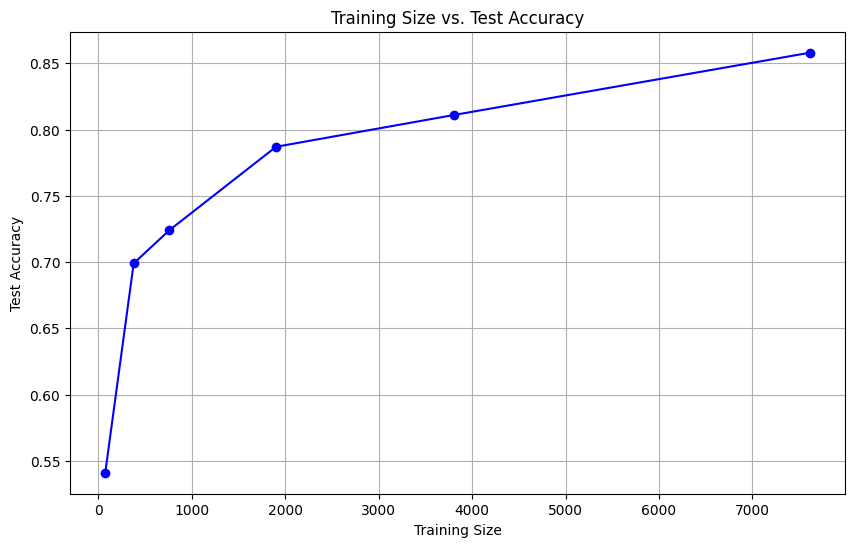

In [13]:
#ANALYSIS - TRAINING SIZE OR FEATURE IMPORTANCE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import vstack

# Assume X_train_tfidf, X_val_tfidf, y_train, y_val are already defined and combined
X_train_full = vstack([X_train_tfidf, X_val_tfidf])
y_train_full = pd.concat([y_train, y_val])

# Assume X_test_vectorized and y_test are already defined

# List of training set sizes as percentages
training_sizes = [0.01, 0.05, 0.10, 0.25, 0.50, 1.00]
train_sizes_absolute = [int(size * X_train_full.shape[0]) for size in training_sizes]
knn_accuracies = []

# Train and test the model for each training set size
for size in train_sizes_absolute:
    # Sample data
    indices = np.random.choice(X_train_full.shape[0], size, replace=False)
    X_train_sample = X_train_full[indices]
    y_train_sample = y_train_full.iloc[indices]

    # Initialize and fit the KNN model
    model = KNeighborsClassifier(n_neighbors=10, metric='euclidean', weights='distance')
    model.fit(X_train_sample, y_train_sample)

    # Evaluate on the test data
    labels_test = model.predict(X_test_vectorized)
    score_test = accuracy_score(y_test, labels_test)
    knn_accuracies.append(score_test)
    print(f"Training with {size} samples, Test Accuracy: {score_test:.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_absolute, knn_accuracies, marker='o', linestyle='-', color='b')
plt.title('Training Size vs. Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


Training with 76 samples, Test Accuracy: 0.523
Training with 380 samples, Test Accuracy: 0.546
Training with 761 samples, Test Accuracy: 0.523
Training with 1903 samples, Test Accuracy: 0.527
Training with 3806 samples, Test Accuracy: 0.556
Training with 7613 samples, Test Accuracy: 0.554


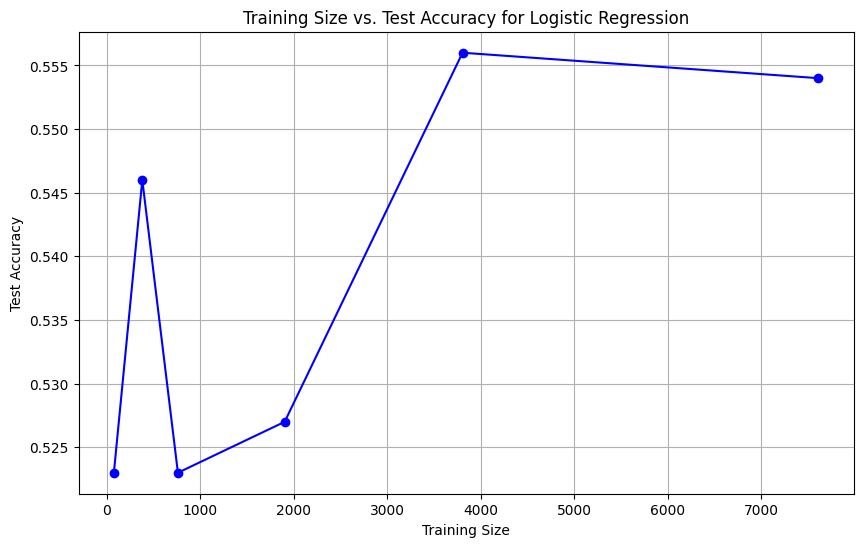

In [14]:
#ANALYSIS ON LOGISTIC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import vstack

# Assume X_train_tfidf, X_val_tfidf, y_train, y_val are already defined and combined
X_train_full = vstack([X_train_BOW, X_val_BOW])
y_train_full = pd.concat([y_train, y_val])

# Assume X_test_vectorized and y_test are already defined

# List of training set sizes as percentages
training_sizes = [0.01, 0.05, 0.10, 0.25, 0.50, 1.00]
train_sizes_absolute = [int(size * X_train_full.shape[0]) for size in training_sizes]
log_accuracies = []

# Train and test the Logistic Regression model for each training set size
for size in train_sizes_absolute:
    # Sample data
    indices = np.random.choice(X_train_full.shape[0], size, replace=False)
    X_train_sample = X_train_full[indices]
    y_train_sample = y_train_full.iloc[indices]

    # Initialize and fit the Logistic Regression model with the best parameters
    model = LogisticRegression(max_iter=10000, C=1, penalty='l2')
    model.fit(X_train_sample, y_train_sample)

    # Evaluate on the test data
    labels_test = model.predict(X_test_vectorized)
    score_test = accuracy_score(y_test, labels_test)
    log_accuracies.append(score_test)
    print(f"Training with {size} samples, Test Accuracy: {score_test:.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_absolute, log_accuracies, marker='o', linestyle='-', color='b')
plt.title('Training Size vs. Test Accuracy for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


Training with 76 samples, Test Accuracy: 0.524
Training with 380 samples, Test Accuracy: 0.549
Training with 761 samples, Test Accuracy: 0.565
Training with 1903 samples, Test Accuracy: 0.684
Training with 3806 samples, Test Accuracy: 0.679
Training with 7613 samples, Test Accuracy: 0.706


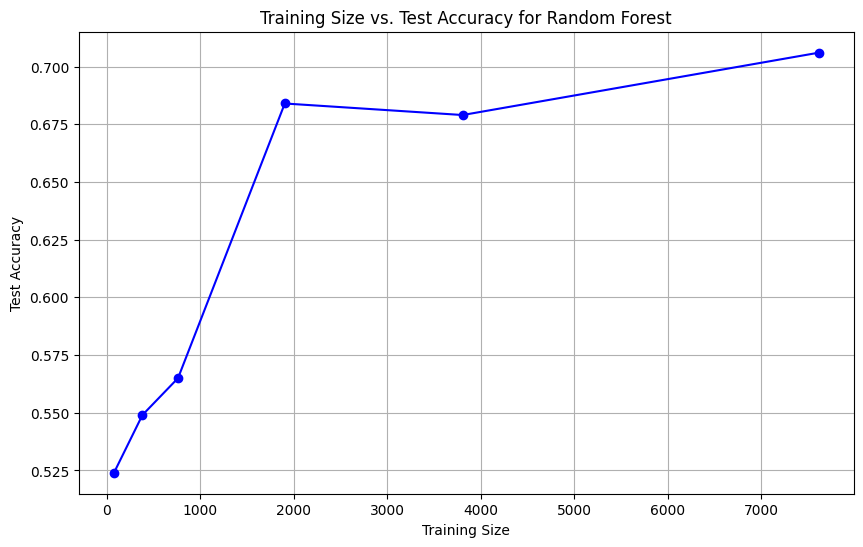

In [15]:
#ANALYSIS ON RANDOM FOREST
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import vstack

# Combining Training and Validation set
X_train_full = vstack([X_train_tfidf, X_val_tfidf])
y_train_full = pd.concat([y_train, y_val])


# List of training set sizes
training_sizes = [0.01, 0.05, 0.10, 0.25, 0.50, 1.00]
train_sizes_absolute = [int(size * X_train_full.shape[0]) for size in training_sizes]
rf_accuracies = []

# Train and test the Random Forest model for each training set size
for size in train_sizes_absolute:

    indices = np.random.choice(X_train_full.shape[0], size, replace=False)
    X_train_sample = X_train_full[indices]
    y_train_sample = y_train_full.iloc[indices]

    # Initialize and fit the Random Forest model with the best parameters
    model = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=2)
    model.fit(X_train_sample, y_train_sample)

    # Evaluating on the test data
    labels_test = model.predict(X_test_vectorized)
    score_test = accuracy_score(y_test, labels_test)
    rf_accuracies.append(score_test)
    print(f"Training with {size} samples, Test Accuracy: {score_test:.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_absolute, rf_accuracies, marker='o', linestyle='-', color='b')
plt.title('Training Size vs. Test Accuracy for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


In the below code, we plot the Training size against the validation accuracy in order to compare the 3 models with the best parameters.

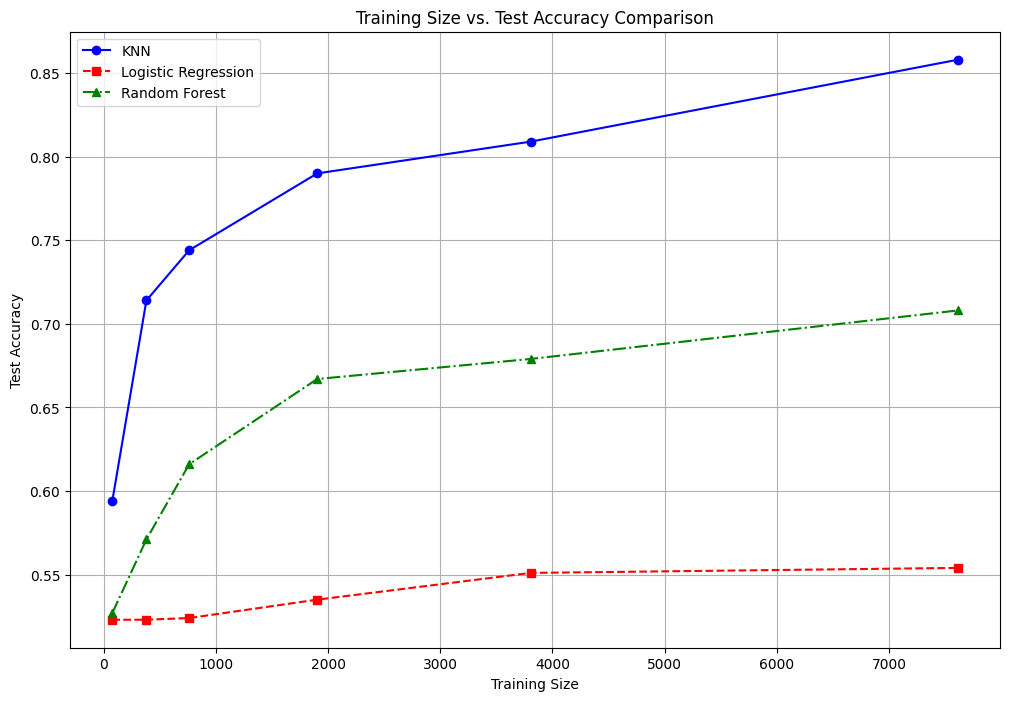

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot for KNN
plt.plot(train_sizes_absolute, knn_accuracies, marker='o', linestyle='-', color='b', label='KNN')

# Plot for Logistic Regression
plt.plot(train_sizes_absolute, log_accuracies, marker='s', linestyle='--', color='r', label='Logistic Regression')

# Plot for Random Forest
plt.plot(train_sizes_absolute, rf_accuracies, marker='^', linestyle='-.', color='g', label='Random Forest')

plt.title('Training Size vs. Test Accuracy Comparison')
plt.xlabel('Training Size')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Based on the above plot, we can see that the KNN model performs the best since it has the highest test accuracy as training size increases, followed by Random Forest Model and the Logistic Regression Model performs the least. Based on this plot, we can conclude that the KNN model is most suited for this challenge.

For Stretch Goals, we generate word vector representation using Glove Embedding model. Glove Embedding offers several advantages over BOW and tf-ifd -
Semantic Information: GloVe embeddings are designed to capture more than just the frequency of words as they canencode semantic relationships between words based on their co-occurrence in large sentences.

Dimensionality: BOW and TF-IDF typically result in very high-dimensional vectors (with dimensions equal to the number of unique words in the corpus), most of which are sparse (i.e., contain many zeros). GloVe embeddings, on the other hand, provide a lower-dimensional, dense representation. This compact representation is generally more efficient and can lead to better performance in many machine learning models.

Generalization: Because GloVe embeddings are trained on a large corpus and learn to capture general language patterns, they can generalize better to unseen words or phrases that are semantically similar to those seen during training. BOW and TF-IDF are limited to the vocabulary seen during training and cannot handle new words effectively.



In [16]:
#STRETCH GOALS - GENERATING WORD VECTOR REPRESENTATION USING GLOVE EMBEDDING

import pandas as pd
import nltk
import gensim.downloader as api

# Download the pre-trained GloVe embeddings
glove_model = api.load("glove-twitter-100")

X = train_df['stopwords_removed']
y = train_df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)
def get_sentence_embedding(sentence):
    embeddings = []
    for word in sentence:
        if word in glove_model:
            embeddings.append(glove_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)


# Get embeddings for train data
X_glove_train = pd.DataFrame(X_train.apply(lambda x: pd.Series(get_sentence_embedding(x))))
# Rename columns
X_glove_train = X_glove_train.rename(columns=lambda x: f'glove_{x}')

# Get embeddings for validation data
X_glove_val = pd.DataFrame(X_val.apply(lambda x: pd.Series(get_sentence_embedding(x))))
# Rename columns
X_glove_val = X_glove_val.rename(columns=lambda x: f'glove_{x}')


[==================================================] 100.0% 387.1/387.1MB downloaded


We use Logistic Regression on this and then select the best Hyperparameters subsequently in the later codes.

In [17]:
#LOGISTIC REGRESSION ON THESE GLOVE EMBEDDINGS
Log_regression(X_glove_train,X_glove_val,y_train,y_val)

Validation accuracy: 0.811
Training accuracy: 0.800


In [18]:
#HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# perform grid search cross-validation to find best hyperparameters
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_glove_train, y_train)

# evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_glove_val, y_val)

print("Best hyperparameters: ", grid_search.best_params_)
print("Validation accuracy: {:.3f}".format(val_accuracy))

Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation accuracy: 0.810


We use the best model based on the best hyperparameters.

In [19]:
#USING THE BEST MODEL

Best_model = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
Best_model.fit(X_glove_train, y_train)
labels = Best_model.predict(X_glove_val)

score = Best_model.score(X_glove_val, y_val)

print("Validation accuracy: %0.3f" % score)

score = Best_model.score(X_glove_train, y_train)
print("Training accuracy: %0.3f" % score)

Validation accuracy: 0.810
Training accuracy: 0.801
